In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.loadtxt("../data/obs/t1214-cleanf0.dat")

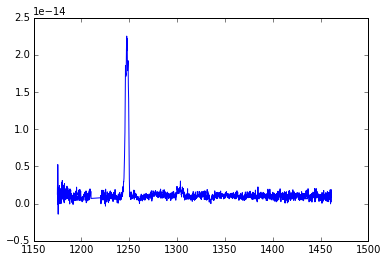

In [3]:
plt.plot(data[:,0], data[:,1])

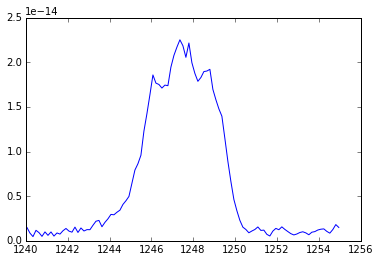

In [4]:
ii = (data[:,0] < 1255) & (data[:,0] > 1240)
wavelen = data[ii,0]
intensity = data[ii,1]
plt.plot(wavelen, intensity)

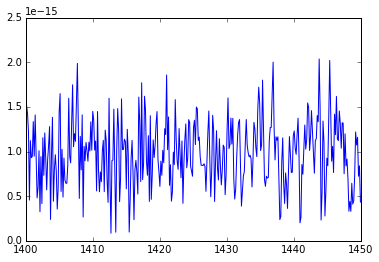

In [5]:
ii_cont = (data[:,0] <1450) & (data[:,0] > 1400)
wavelen_cont = data[ii_cont,0]
intensity_cont = data[ii_cont,1]
plt.plot(wavelen_cont, intensity_cont)

In [6]:
cont_rms = intensity_cont.std()
cont_median = intensity_cont.mean()
signal_noise = cont_rms/cont_median
print cont_rms, cont_median, signal_noise

3.67258092217e-16 9.8070982192e-16 0.374481915046


<Container object of 3 artists>

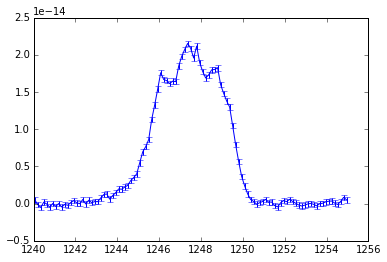

In [10]:
error_bar = np.ones(len(wavelen)) * cont_rms 
intensity_minus_cont = intensity - cont_median
plt.errorbar(wavelen, intensity_minus_cont, yerr=error_bar)

In [11]:
c_light = 299792.458 #km/s
v_receding = 7785.0 #+/- 50kms
lambda_lya = 1215.67
z_tololo = v_receding/c_light 
wavelen_restframe = wavelen/(1.0 + z_tololo)
velocity_units = (1.0-lambda_lya/wavelen_restframe) * c_light 

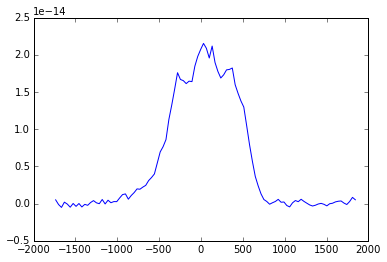

In [12]:
plt.plot(velocity_units, intensity_minus_cont)
norm = np.trapz(intensity_minus_cont, x=velocity_units)

<Container object of 3 artists>

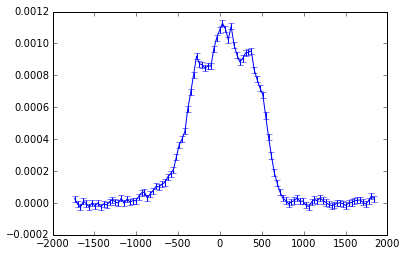

In [13]:
normed_intensity_minus_cont = intensity_minus_cont/norm
normed_error_bar = error_bar/norm
plt.errorbar(velocity_units, normed_intensity_minus_cont, yerr=normed_error_bar)

In [14]:
outfile = open("../data/obs/t1214-cleanf0_normalized.txt", "w")
n = len(normed_error_bar)
outfile.write("# velocity intensity intensity_error\n")
outfile.write("# km/s arbitrary_units arbitrary_units\n")
for i in range(n):
    outfile.write("{} {} {}\n".format(velocity_units[i], normed_intensity_minus_cont[i], normed_error_bar[i]))
outfile.close()